<a href="https://colab.research.google.com/github/rosipapa/colab/blob/main/mall_customers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Mall Segmentation using Kaggle dataset.

https://www.kaggle.com/datasets/vjchoudhary7/customer-segmentation-tutorial-in-python

In [1]:
from google.colab import drive
drive.mount('/drive')

Mounted at /drive


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!ls

drive  sample_data


In [5]:
%matplotlib inline
import pandas as pd
import sklearn
import os
import matplotlib.pyplot as plt
import numpy as np
from scipy.spatial import ConvexHull, convex_hull_plot_2d
import seaborn as sns

In [6]:
# Read train file
df = pd.read_csv("drive/My Drive/Colab Notebooks/datasets/Mall_Customers.csv")

In [7]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [8]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [9]:
df.duplicated().sum()

0

In [10]:
df.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

<ipython-input-14-c1e25bc1398f>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True,cmap='viridis',fmt='.2f',linewidths=2)


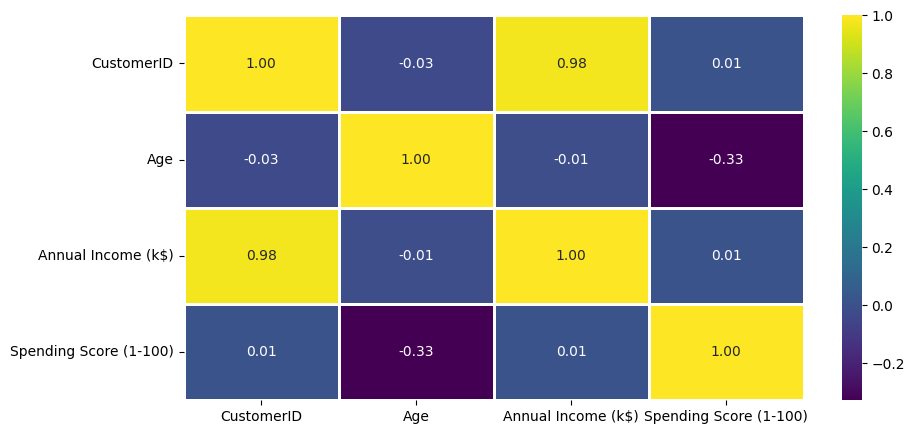

In [14]:
#Plot heatmap to show correlation between variables.
# High correlation in yellow
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(),annot=True,cmap='viridis',fmt='.2f',linewidths=2)
plt.show()

In [15]:
# Create dummies for categorical features
df = pd.get_dummies(df)
df

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Gender_Female,Gender_Male
0,1,19,15,39,0,1
1,2,21,15,81,0,1
2,3,20,16,6,1,0
3,4,23,16,77,1,0
4,5,31,17,40,1,0
...,...,...,...,...,...,...
195,196,35,120,79,1,0
196,197,45,126,28,1,0
197,198,32,126,74,0,1
198,199,32,137,18,0,1


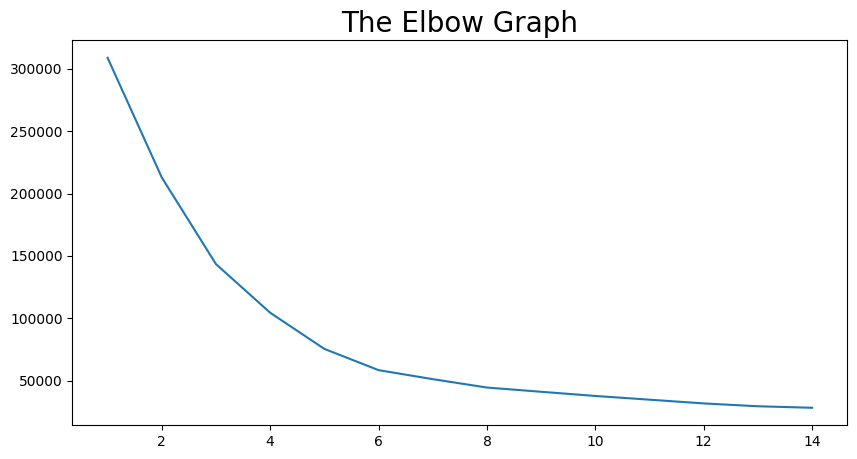

In [16]:
# Plot elbow graphic to determinate number of clusters
from sklearn.cluster import KMeans
import numpy as np
%matplotlib inline

elb = []
x = df.iloc[:,1:5]
for i in range(1, 15):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    elb.append(kmeans.inertia_)

plt.rcParams['figure.figsize'] = (10, 5)
plt.plot(range(1, 15), elb)
plt.title('The Elbow Graph', fontsize = 20)
plt.show()

In [17]:
from sklearn.cluster import KMeans
import numpy as np
%matplotlib inline

# k means
# According elbow graphic, number of clusters is 5
x = df.iloc[:,1:5]
kmeans = KMeans(n_clusters=5, random_state=0)
label = kmeans.fit_predict(df.iloc[:,1:5])

label

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4,
       0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4,
       0, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 3, 1, 2, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 2, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1], dtype=int32)

In [18]:
# first cluster, Annual Income
df.iloc[label == 0 , 2]

0     15
2     16
4     17
6     18
8     19
10    19
12    20
14    20
16    21
18    23
20    24
22    25
24    28
26    28
28    29
30    30
32    33
34    33
36    34
38    37
40    38
42    39
44    39
Name: Annual Income (k$), dtype: int64

<ipython-input-19-4e915ca4585d>:7: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(df.iloc[label == i , 2] , df.iloc[label == i , 3] , label = i,cmap='viridis')


Text(0, 0.5, 'Spending Score')

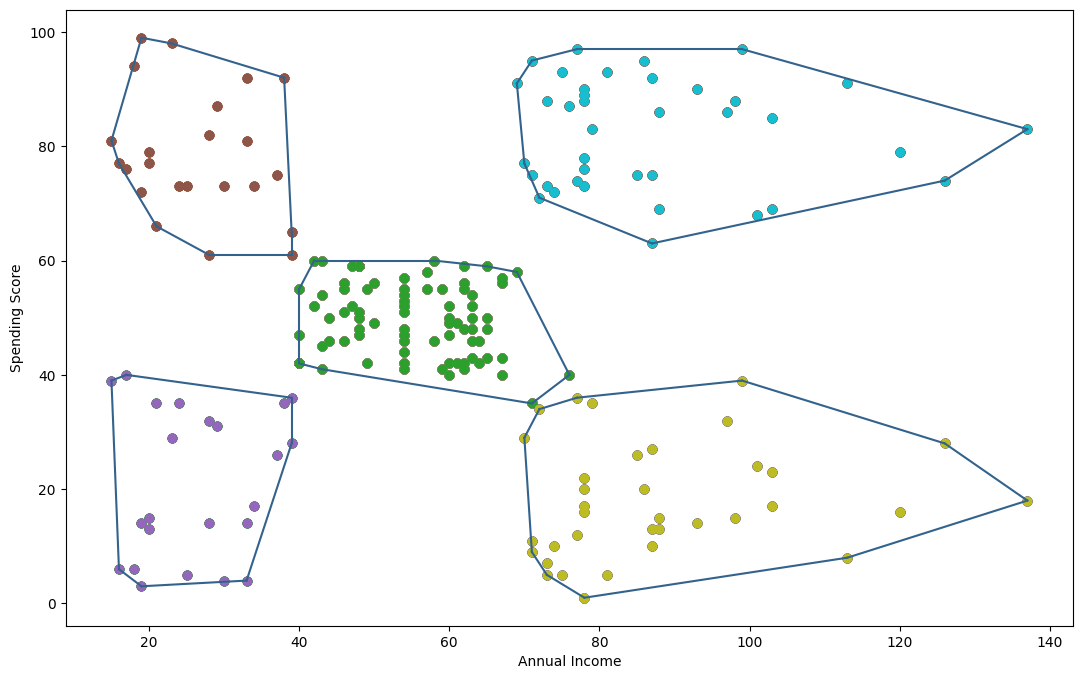

In [19]:
# plot clusters Annual Income vs Spending Score
#2 - Annual Income
#3 - Spending Score

plt.figure(figsize=(13,8))
for i in label:
    plt.scatter(df.iloc[label == i , 2] , df.iloc[label == i , 3] , label = i,cmap='viridis')

for i in range(5):
    points = df.iloc[label == i,2:4]
    hull = ConvexHull(points)
    for simplex in hull.simplices:
        plt.plot(points.iloc[simplex, 0], points.iloc[simplex, 1], '#33638DFF')


plt.xlabel('Annual Income')
plt.ylabel('Spending Score')

In [20]:
from pylab import plot, show, savefig, xlim, figure, ylim, legend, boxplot, setp, axes
# function for setting the colors of the box plots pairs
def setBoxColors(bp):
    setp(bp['boxes'][0], color='#440154FF')
    setp(bp['medians'][0], color='black')
    setp(bp['boxes'][1], color='#1F968BFF')
    setp(bp['caps'][1], color='black')
    setp(bp['whiskers'][2], color='black')
    setp(bp['fliers'][2], color='black')
    setp(bp['medians'][1], color='black')
    setp(bp['boxes'][2], color='#FDE725FF')
    setp(bp['medians'][2], color='black')
    setp(bp['boxes'][3], color='#B4DE2CFF')
    setp(bp['medians'][3], color='black')
    setp(bp['boxes'][4], color= '#3E4A89FF')
    setp(bp['medians'][4], color='black')

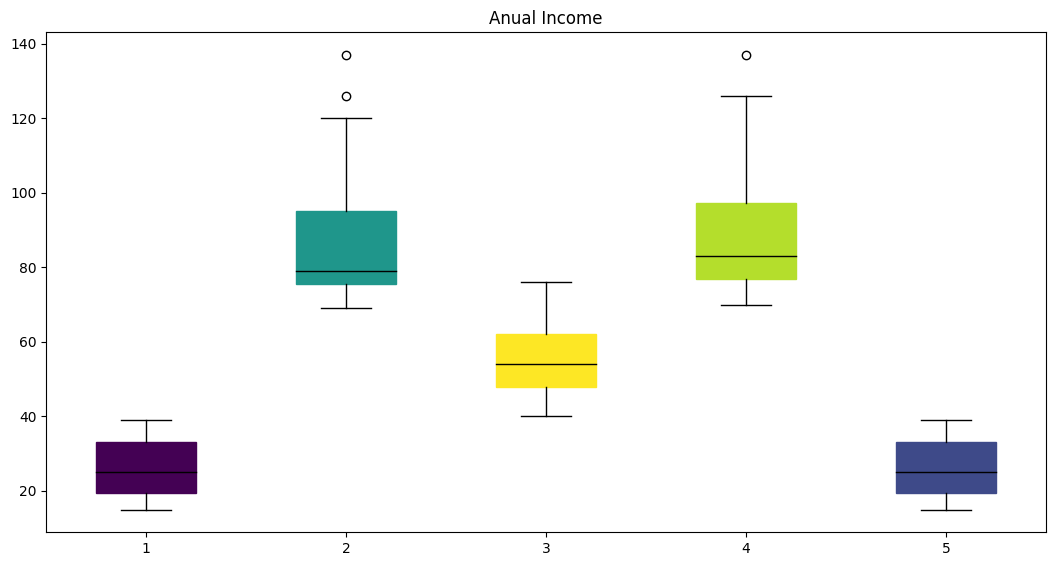

In [21]:
# plot boxplot of the clusters with Anual Income
c1 = df.iloc[label == 0 , 2]
c2 = df.iloc[label == 1 , 2]
c3 = df.iloc[label == 2 , 2]
c4 = df.iloc[label == 3 , 2]
c5 = df.iloc[label == 4 , 2]

fig = plt.figure(figsize =(10, 5))
ax = fig.add_axes([0, 0, 1, 1])
cluster_anual_income = [c1,c2,c3,c4,c5]
boxplot = ax.boxplot(cluster_anual_income, vert=True, patch_artist=True)
plt.title("Anual Income")
setBoxColors(boxplot)

Text(0.5, 1.0, 'Spending Score')

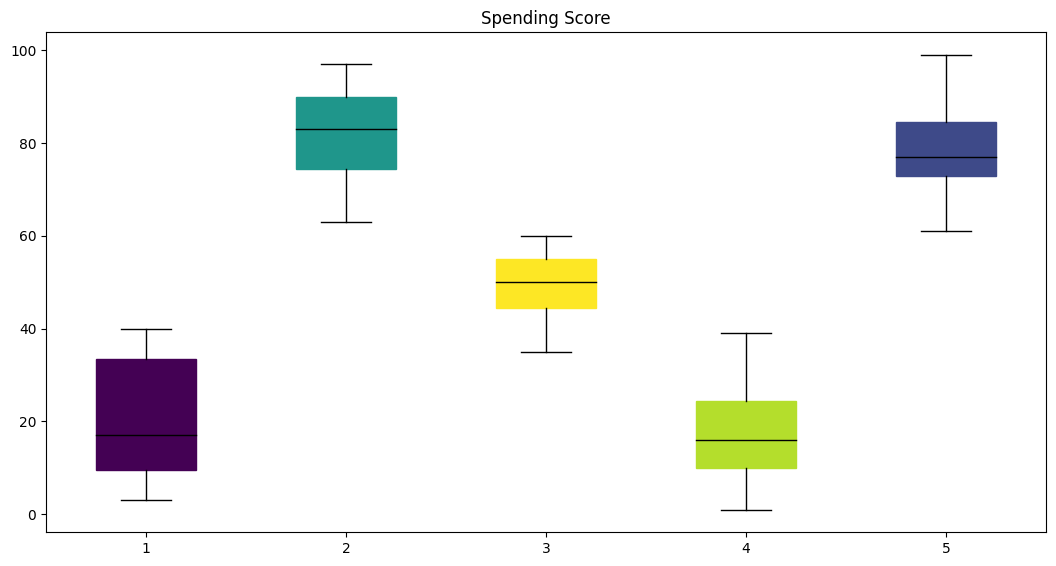

In [22]:
# plot boxplot of the clusters with Spending Score
c1 = df.iloc[label == 0 , 3]
c2 = df.iloc[label == 1 , 3]
c3 = df.iloc[label == 2 , 3]
c4 = df.iloc[label == 3 , 3]
c5 = df.iloc[label == 4 , 3]

fig = plt.figure(figsize =(10, 5))
ax = fig.add_axes([0, 0, 1, 1])
cluster_spending_score = [c1,c2,c3,c4,c5]
boxplot = ax.boxplot(cluster_spending_score,vert=True, patch_artist=True)
setBoxColors(boxplot)
plt.title("Spending Score")

Text(0.5, 1.0, 'Age')

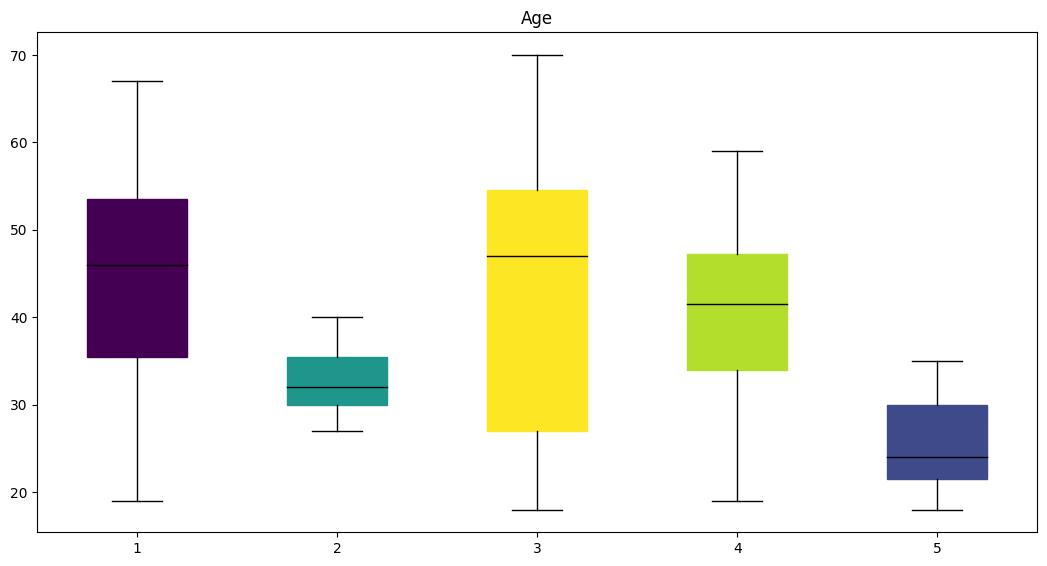

In [23]:
# plot boxplot of the clusters with Age
c1 = df.iloc[label == 0 , 1]
c2 = df.iloc[label == 1 , 1]
c3 = df.iloc[label == 2 , 1]
c4 = df.iloc[label == 3 , 1]
c5 = df.iloc[label == 4 , 1]

fig = plt.figure(figsize =(10, 5))
ax = fig.add_axes([0, 0, 1, 1])
cluster_age = [c1,c2,c3,c4,c5]
boxplot = ax.boxplot(cluster_age,vert=True, patch_artist=True)
setBoxColors(boxplot)
plt.title("Age")